In [1]:
# Required Libraries
import pandas as pd

# Load dataset
file_path = 'data.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Show basic info
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("\nUnique values for key categorical columns:")

# Check unique values in specific columns
for col in ['Sex', 'StressLevel', 'DietType']:
    print(f"{col}: {df[col].unique()}")



Dataset Shape: (45190, 17)
Column Names: ['PatientID', 'VisitID', 'VisitDate', 'Age', 'Sex', 'BMI', 'GlucoseLevel', 'HbA1c', 'BP_Systolic', 'BP_Diastolic', 'Smoker', 'PhysicalActivity', 'StressLevel', 'SleepHours', 'DietType', 'Diabetes', 'HeartDisease']

Unique values for key categorical columns:
Sex: [0 1]
StressLevel: ['Moderate' 'Low' 'High']
DietType: ['Vegetarian' 'Keto' 'Balanced' 'High-carb']


In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Keep only relevant columns
required_columns = [
    'Age', 'Sex', 'BMI', 'GlucoseLevel', 'HbA1c',
    'BP_Systolic', 'BP_Diastolic', 'Smoker', 'PhysicalActivity',
    'StressLevel', 'SleepHours', 'DietType', 'Diabetes', 'HeartDisease'
]
df = df[required_columns]

# Drop missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Print cleaned shape
print("Cleaned DataFrame shape:", df.shape)
df.head()


Cleaned DataFrame shape: (45190, 14)


,Age,Sex,BMI,GlucoseLevel,HbA1c,BP_Systolic,BP_Diastolic,Smoker,PhysicalActivity,StressLevel,SleepHours,DietType,Diabetes,HeartDisease
0,18,0,23.9,90,5.6,121,72,0,1,Moderate,7.9,Vegetarian,0,0
1,18,0,24.5,93,5.7,124,77,0,0,Moderate,5.8,Keto,0,0
2,18,0,24.7,90,5.6,118,74,0,0,Low,6.0,Balanced,0,0
3,18,0,23.9,101,6.0,112,75,0,1,High,7.7,High-carb,0,0
4,18,1,20.1,99,5.9,114,71,0,1,Low,7.0,Keto,0,0


In [3]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns to encode
categorical_cols = ['StressLevel', 'DietType']

# One-hot encode these columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Align indexes before merging
encoded_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Drop original categorical columns and merge one-hot encoded columns
df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Show final shape
print("Final DataFrame shape after encoding:", df_final.shape)
df_final.head()


Final DataFrame shape after encoding: (45190, 17)


,Age,Sex,BMI,GlucoseLevel,HbA1c,BP_Systolic,BP_Diastolic,Smoker,PhysicalActivity,SleepHours,Diabetes,HeartDisease,StressLevel_Low,StressLevel_Moderate,DietType_High-carb,DietType_Keto,DietType_Vegetarian
0,18,0,23.9,90,5.6,121,72,0,1,7.9,0,0,0.0,1.0,0.0,0.0,1.0
1,18,0,24.5,93,5.7,124,77,0,0,5.8,0,0,0.0,1.0,0.0,1.0,0.0
2,18,0,24.7,90,5.6,118,74,0,0,6.0,0,0,1.0,0.0,0.0,0.0,0.0
3,18,0,23.9,101,6.0,112,75,0,1,7.7,0,0,0.0,0.0,1.0,0.0,0.0
4,18,1,20.1,99,5.9,114,71,0,1,7.0,0,0,1.0,0.0,0.0,1.0,0.0


In [4]:
from sklearn.model_selection import train_test_split

# Separate features and targets
X = df_final.drop(columns=['Diabetes', 'HeartDisease'])
y = df_final[['Diabetes', 'HeartDisease']]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (36152, 15)
y_train shape: (36152, 2)


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initialize model
model = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear'))

# Train the model
model.fit(X_train_scaled, y_train)

print("✅ Model training complete.")


✅ Model training complete.


In [7]:
from sklearn.metrics import classification_report, accuracy_score, hamming_loss

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Classification report for both targets
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Diabetes', 'Heart Disease']))

# Exact match accuracy (both labels must be correct)
exact_match = accuracy_score(y_test, y_pred)
print(f"\n✅ Exact Match Accuracy: {exact_match:.4f}")

# Hamming loss (lower is better)
hamming = hamming_loss(y_test, y_pred)
print(f"📉 Hamming Loss: {hamming:.4f}")


🔍 Classification Report:

               precision    recall  f1-score   support

     Diabetes       0.96      0.96      0.96      4746
Heart Disease       1.00      1.00      1.00      2379

    micro avg       0.97      0.98      0.97      7125
    macro avg       0.98      0.98      0.98      7125
 weighted avg       0.97      0.98      0.97      7125
  samples avg       0.51      0.51      0.51      7125


✅ Exact Match Accuracy: 0.9572
📉 Hamming Loss: 0.0214


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


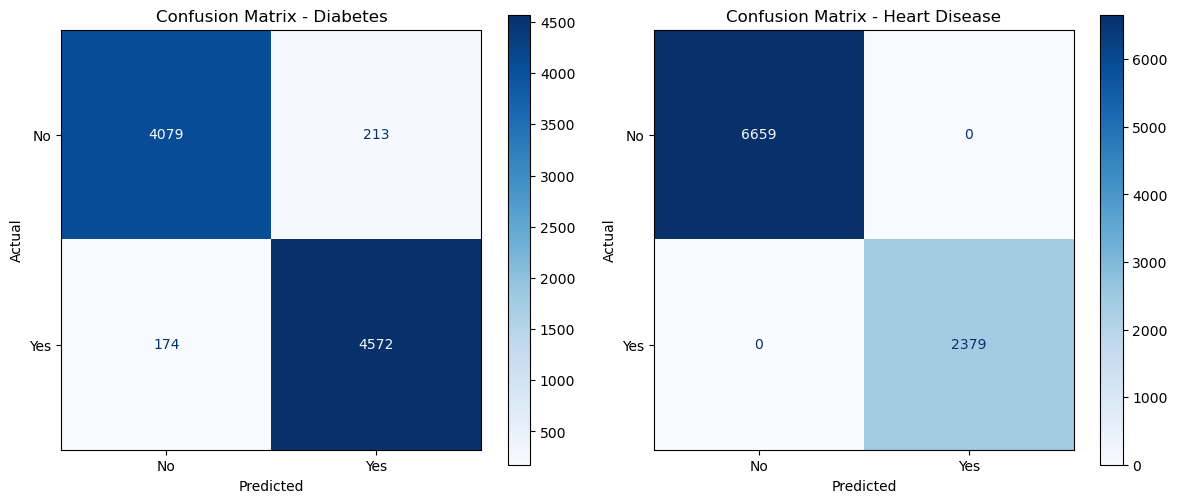

In [8]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrices
cm = multilabel_confusion_matrix(y_test, y_pred)

# Plot each confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
labels = ['Diabetes', 'Heart Disease']

for i, ax in enumerate(axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm[i], display_labels=['No', 'Yes'])
    disp.plot(ax=ax, values_format='d', cmap='Blues')
    ax.set_title(f'Confusion Matrix - {labels[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


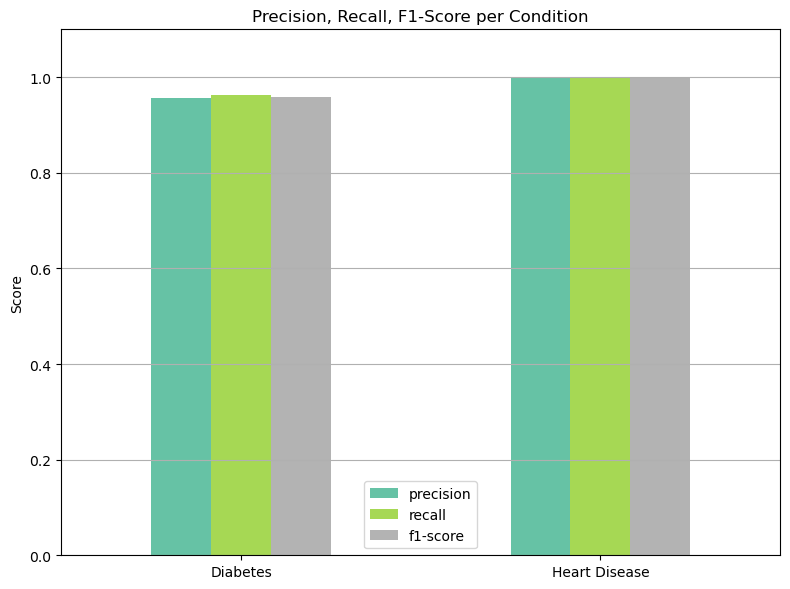

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract classification report as dictionary
report = classification_report(y_test, y_pred, target_names=['Diabetes', 'Heart Disease'], output_dict=True)

# Create a DataFrame from the metrics for just the two labels
df_report = pd.DataFrame(report).transpose().loc[['Diabetes', 'Heart Disease'], ['precision', 'recall', 'f1-score']]

# Plot the metrics
df_report.plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title('Precision, Recall, F1-Score per Condition')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [10]:
import joblib

# Save model and scaler
joblib.dump(model, 'diabetes_heart_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')  # Save the OneHotEncoder used for categorical features



['encoder.pkl']

In [11]:
import pandas as pd
import joblib

# Load model and tools
model = joblib.load('diabetes_heart_model.pkl')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoder.pkl')

# New input (binary fields already encoded)
new_patient = pd.DataFrame([{
    'Age': 45,
    'Sex': 0,
    'BMI': 27.5,
    'GlucoseLevel': 130,
    'HbA1c': 6.8,
    'BP_Systolic': 140,
    'BP_Diastolic': 85,
    'Smoker': 1,
    'PhysicalActivity': 0,
    'StressLevel': 'High',
    'SleepHours': 5.5,
    'DietType': 'High-carb'
}])

# One-hot encode categorical features
cat_cols = ['StressLevel', 'DietType']
encoded_cats = encoder.transform(new_patient[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))

# Combine with numeric
num_cols = ['Age', 'Sex', 'BMI', 'GlucoseLevel', 'HbA1c', 'BP_Systolic',
            'BP_Diastolic', 'Smoker', 'PhysicalActivity', 'SleepHours']
num_df = new_patient[num_cols].reset_index(drop=True)
final_input = pd.concat([num_df, encoded_cat_df.reset_index(drop=True)], axis=1)

# Scale and predict
scaled_input = scaler.transform(final_input)
prediction = model.predict(scaled_input)[0]     # e.g., [1, 0]
probs = model.predict_proba(scaled_input)[0]    # e.g., [0.91, 0.32]

# Display predictions
print("Diabetes Prediction:", "Yes" if prediction[0] == 1 else "No", f"({probs[0]*100:.2f}%)")
print("Heart Disease Prediction:", "Yes" if prediction[1] == 1 else "No", f"({probs[1]*100:.2f}%)")


Diabetes Prediction: Yes (99.92%)
Heart Disease Prediction: No (14.10%)
